# Warsztaty Python część 1: Eksploracja danych + feature engineering

## Wczytywanie danych: 

###Wbudowane datasety

**Wbudowane w scikit-learn zbiory danych** (i inne wbudowane w scikit-learn zbiordy danych dostępne tu: https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [28]:
from sklearn.datasets import load_iris
data = load_iris()
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [29]:
import pandas as pd

df_iris = pd.DataFrame(data=data.data)
df_iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
df_iris = pd.DataFrame(data=data.data, columns=data.feature_names)
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [31]:
df_iris['target'] = data.target
df_iris[df_iris.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [32]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [33]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


###Ręczne pobieranie zbiorów danych (tu na przykładach UCI i Kaggle)

**UCI Machine Learning Repository** to klasyczne źródło popularnych zbiorów danych do projektów z data science czy uczenia maszynowego.

(Uwaga): zbiory danych w UCI często są w jakichś egzotycznych formatach

Source: https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

In [34]:
df = pd.read_csv('Youtube05-Shakira.csv')
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [35]:
df.describe()

,CLASS
count,370.000000
mean,0.470270
std,0.499791
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  370 non-null    object
 1   AUTHOR      370 non-null    object
 2   DATE        370 non-null    object
 3   CONTENT     370 non-null    object
 4   CLASS       370 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 14.6+ KB


**Kaggle** to szalenie popularne źródło i zwyczajnych zbiorów danych, i konkurencji data science, i ich najlepszych rozwiązań.

Source: https://www.kaggle.com/sametevik/shop-sales

In [37]:
df = pd.read_excel('SHOP-SALES.xlsx')  
df.head()

,Date,HOUR,GENDER,PRODUCT,COLOR,SIZE,SALE CONSULTANT,QUANTITY,PRICE,VAT,TOTAL
0,2020-06-01,10:21:00,MEN,T SHIRT,2160,XS,Mary Taylor,1,36.94,2.96,39.9
1,2020-06-01,10:24:00,WOMEN,SHIRT LONG SLEEVE,2550,40,Kelli Cooley,1,73.98,5.92,79.9
2,2020-06-01,10:26:00,MEN,SHIRT LONG SLEEVE,900,45X,Bradley Saldana,1,73.98,5.92,79.9
3,2020-06-01,10:29:00,WOMEN,KNIT TROUSERS,600,XL,Kelli Cooley,1,46.20,3.70,49.9
4,2020-06-01,10:30:00,MEN,SHIRT LONG SLEEVE,1800,39X,Robert Moran,1,82.32,6.58,88.9


In [38]:
df.describe()

,COLOR,QUANTITY,PRICE,VAT,TOTAL
count,9999.000000,9999.0,9999.000000,9999.000000,9999.000000
mean,1421.913591,1.0,53.332498,4.058598,57.391096
std,886.412303,0.0,23.698994,2.050336,25.478444
min,3.000000,1.0,0.000000,0.000000,0.000000
25%,600.000000,1.0,36.940000,2.960000,39.900000
50%,1050.000000,1.0,46.200000,3.700000,49.900000
75%,2190.000000,1.0,64.720000,5.180000,69.900000
max,2997.000000,1.0,258.330000,20.670000,279.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             9999 non-null   datetime64[ns]
 1   HOUR             9999 non-null   object        
 2   GENDER           9999 non-null   object        
 3   PRODUCT          9999 non-null   object        
 4   COLOR            9999 non-null   int64         
 5   SIZE             9999 non-null   object        
 6   SALE CONSULTANT  9999 non-null   object        
 7   QUANTITY         9999 non-null   int64         
 8   PRICE            9999 non-null   float64       
 9   VAT              9999 non-null   float64       
 10  TOTAL            9999 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 859.4+ KB


###Pobieranie zbioru danych przez URL

**Pobierzemy zbiór danych Titanic przez repozytorium znajdujące się na Githubie:** 

(co jest możliwe w tym przypadku bo zbiór danych jest odpowiednio mały, w przypadku większej ilości danych pewnie nie byłyby tak po prostu przechowywane jako plik na GitHubie).

In [40]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col = 'PassengerId')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Eksploracja danych

In [42]:
titanic_df.size

9801

In [43]:
titanic_df.shape

(891, 11)

In [44]:
titanic_df.memory_usage()

Index       7128
Survived    7128
Pclass      7128
Name        7128
Sex         7128
Age         7128
SibSp       7128
Parch       7128
Ticket      7128
Fare        7128
Cabin       7128
Embarked    7128
dtype: int64

In [45]:
titanic_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [46]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [47]:
titanic_df.head(13)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [48]:
titanic_df.tail(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [49]:
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [50]:
round(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()*100, 2)

,Survived
Pclass,
1,62.96
2,47.28
3,24.24


In [51]:
round(titanic_df[['Pclass', 'Survived', 'Sex']].groupby(['Pclass', 'Sex']).mean()*100, 2)

Survived
Pclass Sex             
1      female     96.81
       male       36.89
2      female     92.11
       male       15.74
3      female     50.00
       male       13.54

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

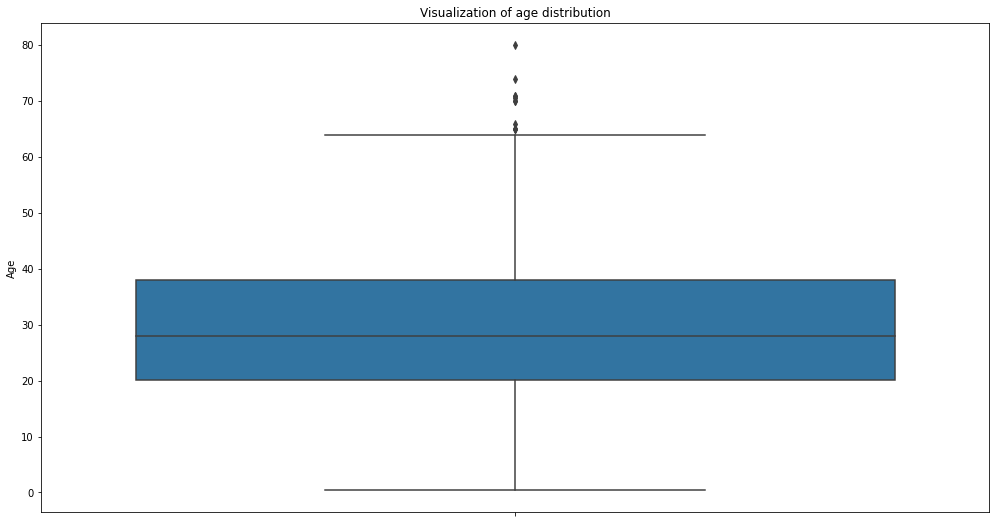

In [53]:
plt.figure(figsize=(17,9))
plt.title('Visualization of age distribution')
ax = sns.boxplot(y="Age", data=titanic_df)

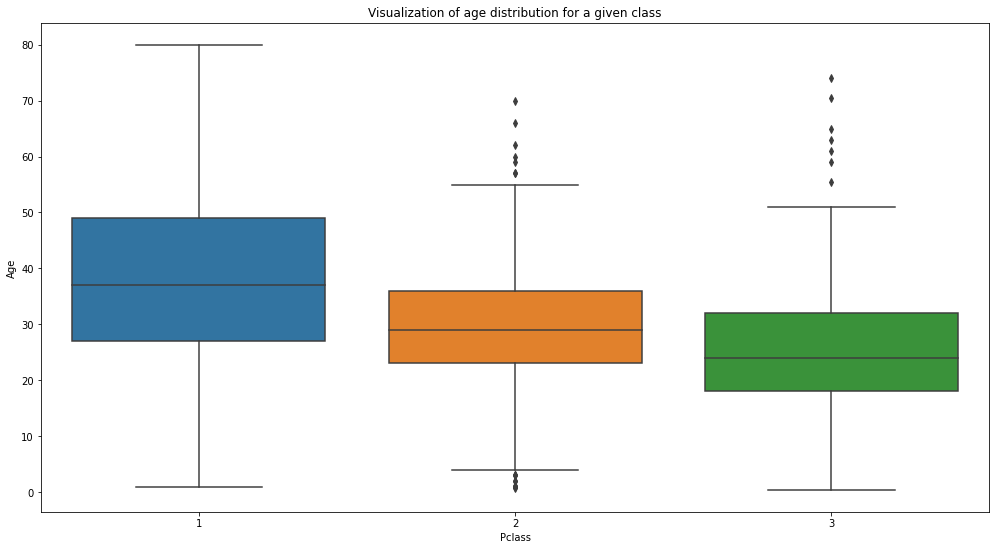

In [54]:
plt.figure(figsize=(17,9))
plt.title('Visualization of age distribution for a given class')
ax = sns.boxplot(x="Pclass",y='Age',data=titanic_df)

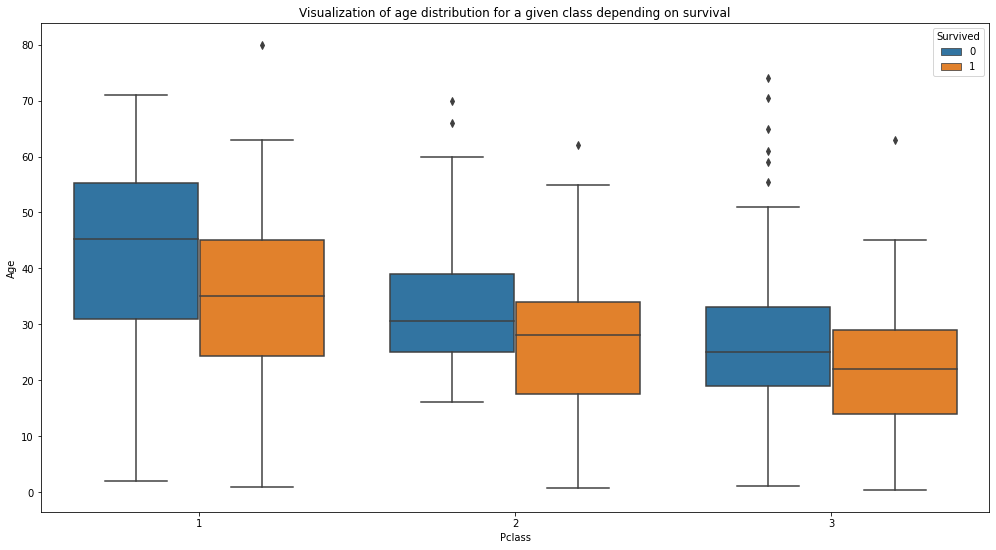

In [55]:
plt.figure(figsize=(17,9))
plt.title('Visualization of age distribution for a given class depending on survival')
ax = sns.boxplot(x="Pclass",y='Age',data=titanic_df, hue="Survived")

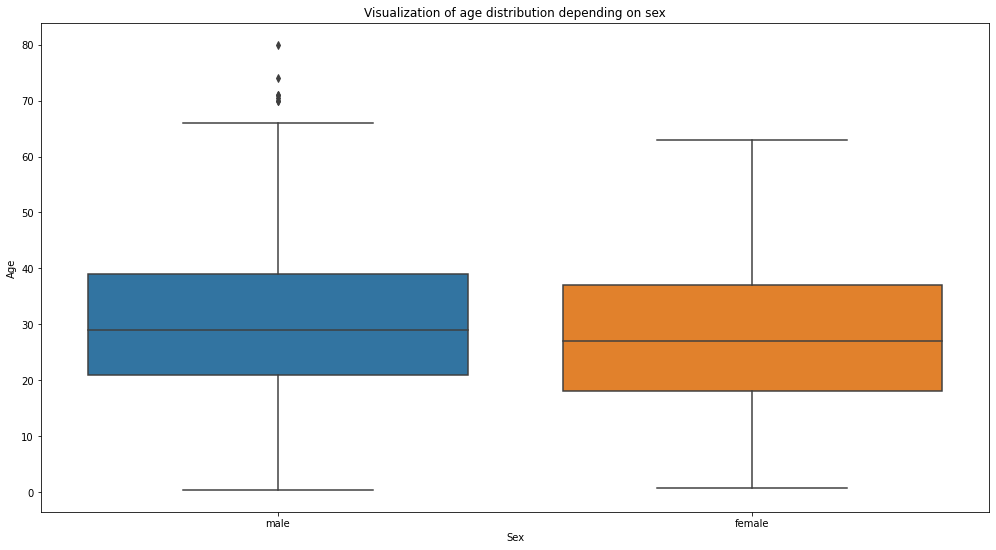

In [56]:
plt.figure(figsize=(17,9))
plt.title('Visualization of age distribution depending on sex')
ax = sns.boxplot(x="Sex",y='Age',data=titanic_df)

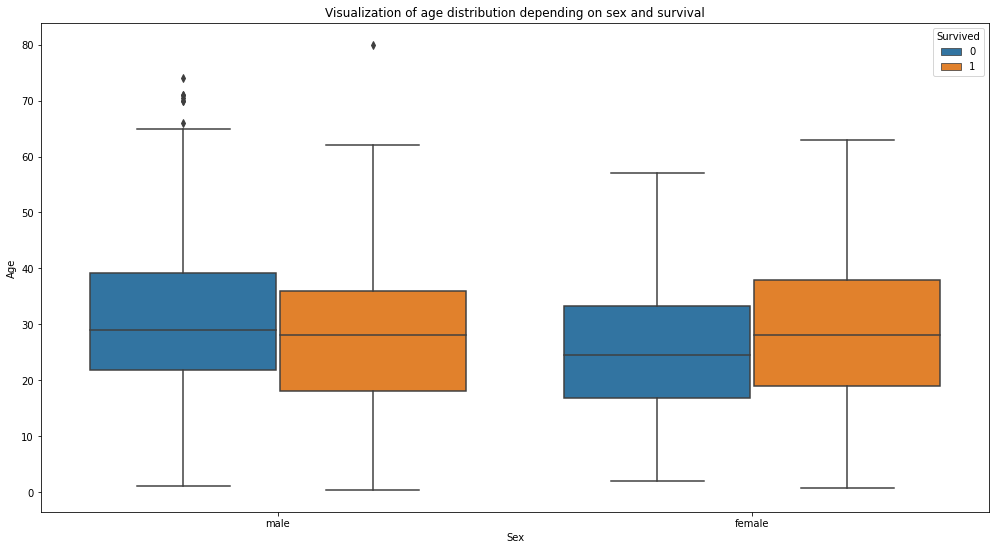

In [57]:
plt.figure(figsize=(17,9))
plt.title('Visualization of age distribution depending on sex and survival')
ax = sns.boxplot(x="Sex",y='Age', hue="Survived", data=titanic_df)

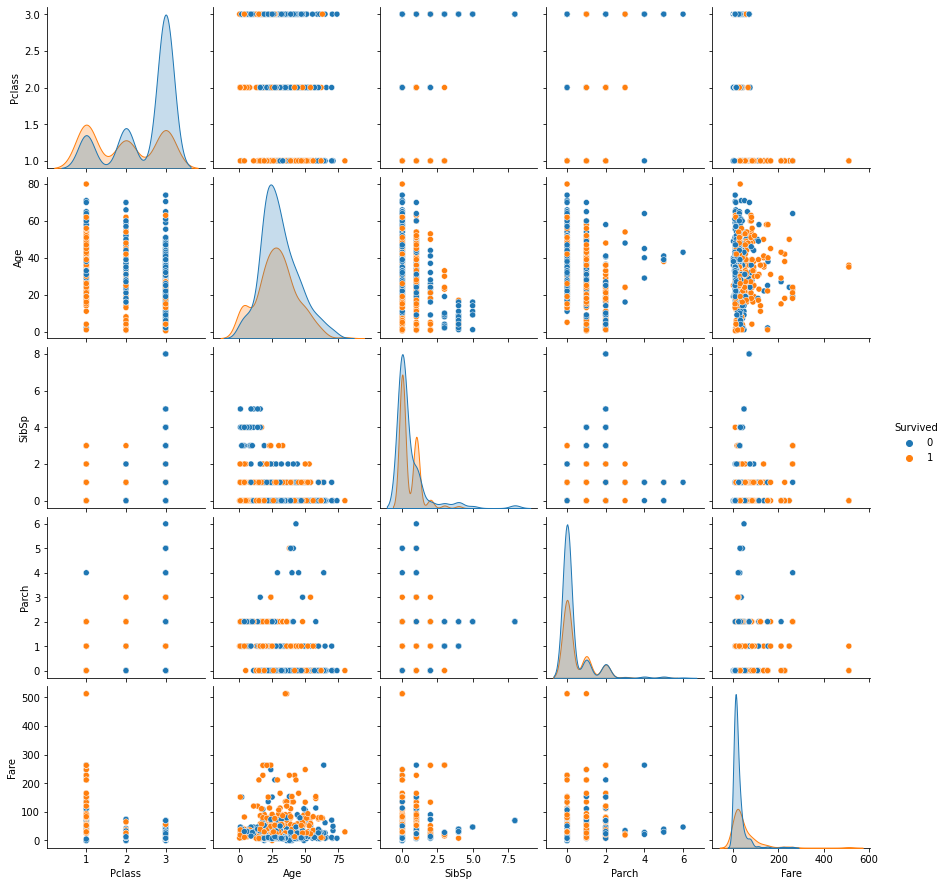

In [58]:

ax = sns.pairplot(titanic_df, hue="Survived")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


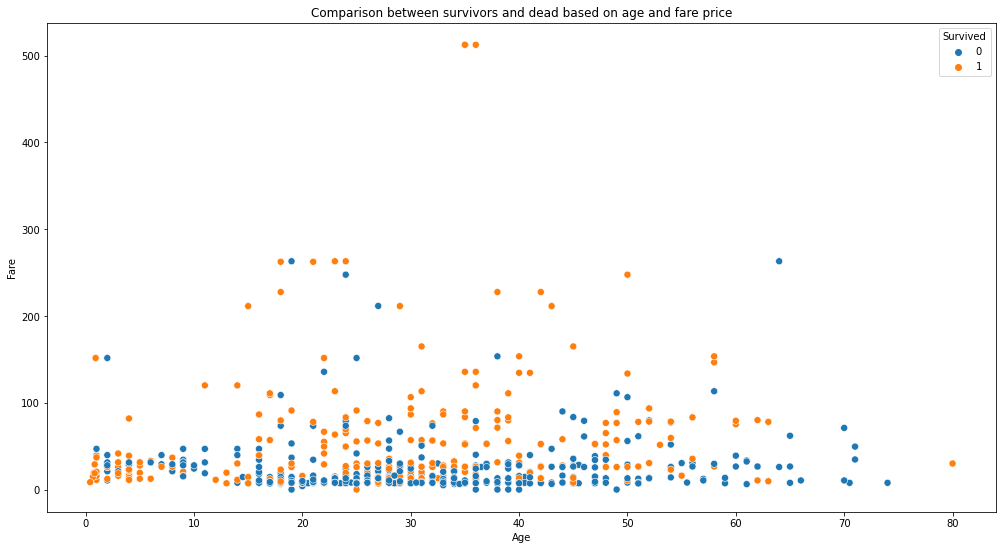

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,9))
plt.title('Comparison between survivors and dead based on age and fare price')
ax = sns.scatterplot(titanic_df['Age'],titanic_df['Fare'],hue =titanic_df['Survived'],s=50)

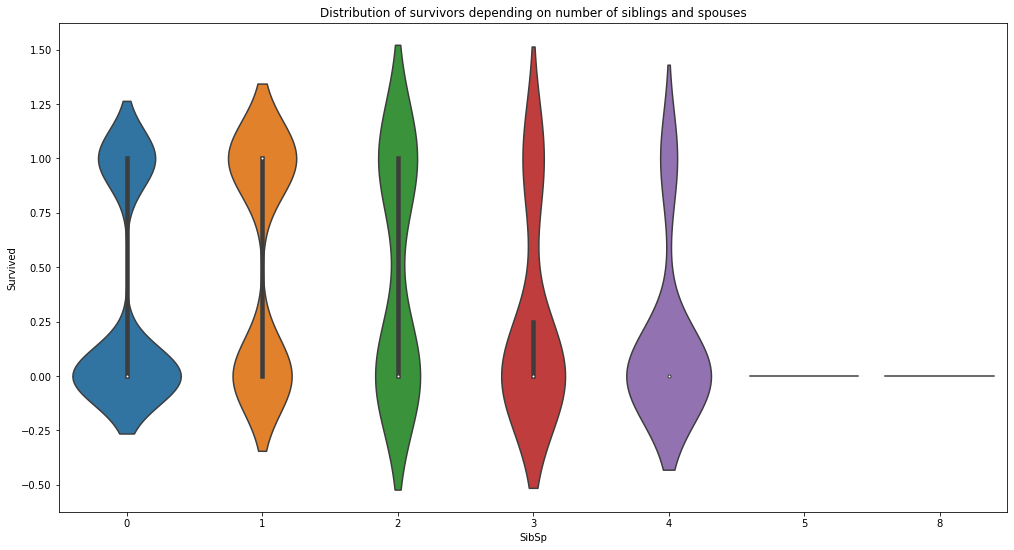

In [60]:
plt.figure(figsize=(17,9))
plt.title('Distribution of survivors depending on number of siblings and spouses')
ax = sns.violinplot(y='Survived', x='SibSp', data=titanic_df)

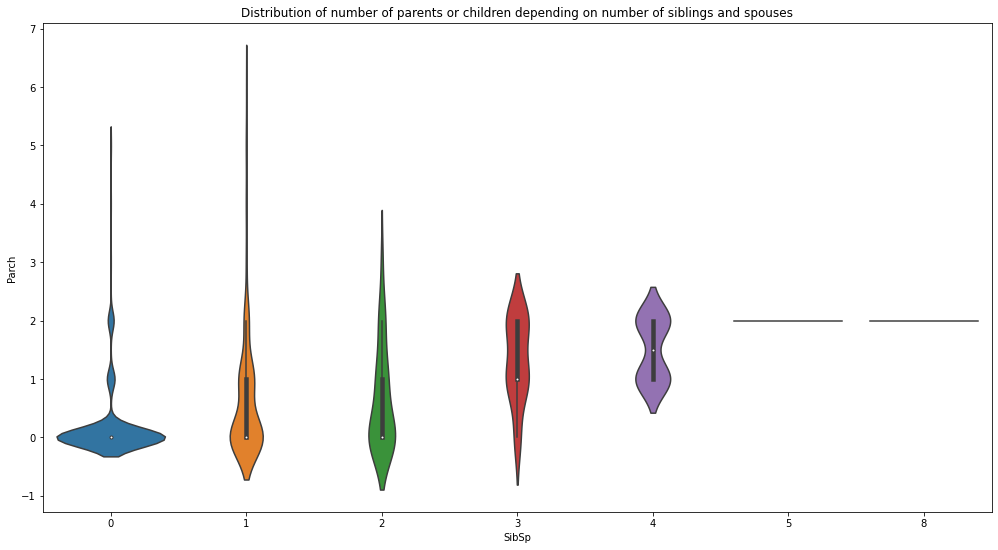

In [61]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(17,9))
plt.title('Distribution of number of parents or children depending on number of siblings and spouses')
sns.violinplot(y='Parch', x='SibSp', data=titanic_df)

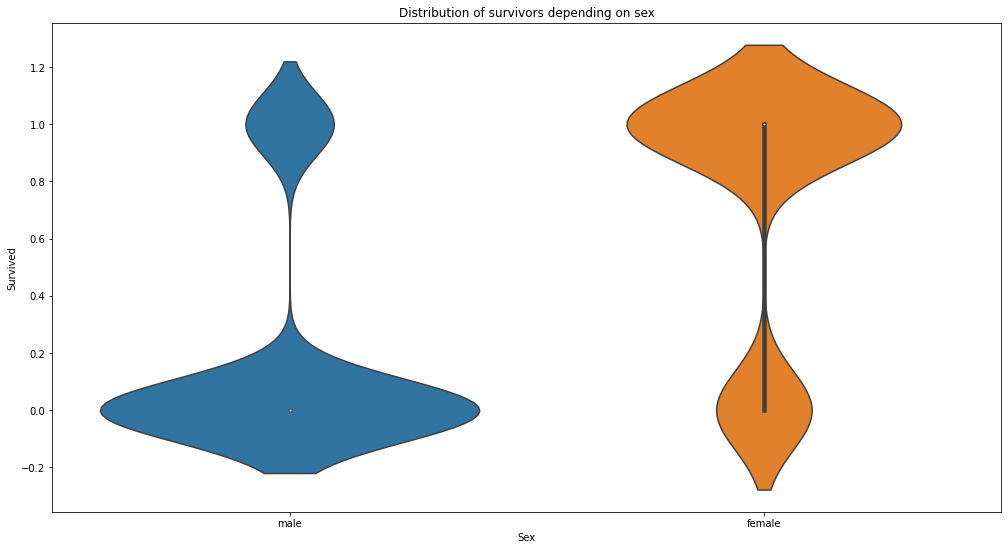

In [62]:
plt.figure(figsize=(17,9))
plt.title('Distribution of survivors depending on sex')
ax = sns.violinplot(y='Survived', x='Sex', data=titanic_df)

In [63]:
titanic_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


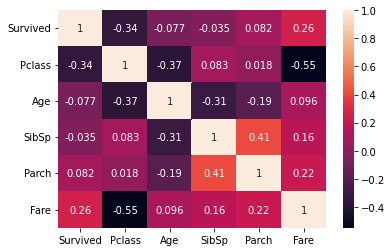

In [64]:
corr_mat = titanic_df.corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

In [65]:
len(titanic_df.Ticket.unique()), len(titanic_df.Ticket)

(681, 891)

In [66]:
titanic_df[titanic_df.Ticket.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [67]:
len(titanic_df[(titanic_df.Ticket.duplicated()) & (titanic_df.SibSp==0) & (titanic_df.Parch==0)])

44

In [68]:
titanic_df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

More about cabin allocation on Titanic: https://www.encyclopedia-titanica.org/cabins.html

##Pandas-profiling

In [69]:
!pip install --upgrade pandas-profiling

In [70]:
from pandas_profiling import ProfileReport
prof = ProfileReport(titanic_df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Uzupełnianie danych

### Sprawdzamy, gdzie i ile brakuje danych

In [71]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [72]:
titanic_df.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [73]:
round(titanic_df.isnull().sum()/len(titanic_df), 5)

Survived    0.00000
Pclass      0.00000
Name        0.00000
Sex         0.00000
Age         0.19865
SibSp       0.00000
Parch       0.00000
Ticket      0.00000
Fare        0.00000
Cabin       0.77104
Embarked    0.00224
dtype: float64

Kolumna Embarked zawiera niewiele pustych wartości, kolumna Age ma ich znaczną ilość a kolumna Cabin w większości się z nich składa.

In [74]:
titanic_df.drop(['Cabin'], axis=1, inplace=True)

In [75]:
round(titanic_df.isnull().sum()/len(titanic_df), 5)

Survived    0.00000
Pclass      0.00000
Name        0.00000
Sex         0.00000
Age         0.19865
SibSp       0.00000
Parch       0.00000
Ticket      0.00000
Fare        0.00000
Embarked    0.00224
dtype: float64

### Imputacja na Embarked

In [76]:
titanic_df[titanic_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [77]:
#titanic_df.dropna(subset=['Embarked'], inplace=True)

In [78]:
titanic_df['Embarked'].fillna(method='ffill', inplace=True)

In [79]:
round(titanic_df.isnull().sum()/len(titanic_df), 5)

Survived    0.00000
Pclass      0.00000
Name        0.00000
Sex         0.00000
Age         0.19865
SibSp       0.00000
Parch       0.00000
Ticket      0.00000
Fare        0.00000
Embarked    0.00000
dtype: float64

In [80]:
titanic_df.loc[[60, 61, 828, 829],:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,C
829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,Q


### Imputacja na Age

In [81]:
titanic_df.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [82]:
titanic_df['Title'] = titanic_df.Name.str.extract('([A-Za-z]+)\.', expand=True)

In [83]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [84]:
titanic_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [85]:
titanic_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

Some of these titles are just French versions of the more common English title, like Mme == Madame == Mrs. 

We will only use the titles with counts more than 5 and estimate ages of other titles by replacing them with the most appropriate of these 6.

In [86]:
title_swap = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr',
              'Sir': 'Mr', 'Don':'Mr', 'Mme':'Mrs', 'Jonkheer':'Mr',
              'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss',
              'Dona': 'Mrs'}
titanic_df.replace({'Title':title_swap}, inplace=True)

In [87]:
titanic_df.Title.value_counts()

Mr        525
Miss      185
Mrs       128
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

In [88]:
mean_ages_by_title = dict(round(titanic_df.groupby('Title')['Age'].mean()))
mean_ages_by_title

{'Dr': 42.0, 'Master': 5.0, 'Miss': 22.0, 'Mr': 33.0, 'Mrs': 36.0, 'Rev': 43.0}

In [89]:
titanic_df['mean_age'] = titanic_df.Title.apply(lambda x: mean_ages_by_title[x])

In [90]:
titanic_df['Age'].fillna(titanic_df['mean_age'], inplace=True)
del titanic_df['mean_age']

In [91]:
round(titanic_df.isnull().sum()/len(titanic_df), 5)

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
Title       0.0
dtype: float64

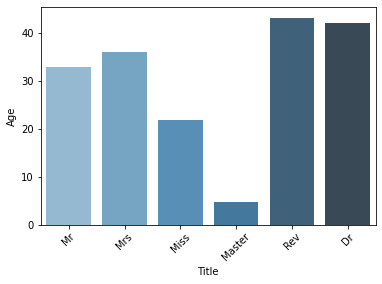

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Title', y='Age', data=titanic_df, estimator=np.mean, ci=None, palette='Blues_d')
plt.xticks(rotation=45)
plt.show()

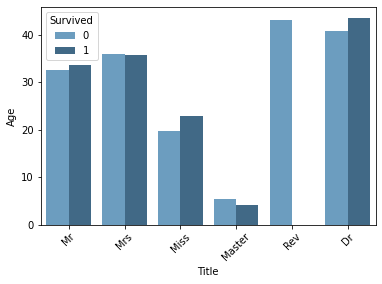

In [93]:
sns.barplot(x='Title', y='Age',hue='Survived', data=titanic_df, estimator=np.mean, ci=None, palette='Blues_d')
plt.xticks(rotation=45)
plt.show()

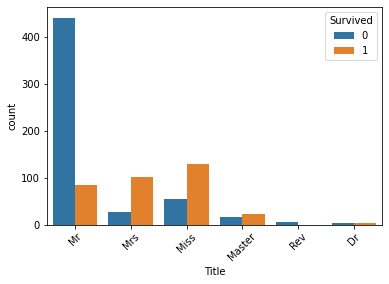

In [94]:
sns.countplot(x='Title', data=titanic_df, hue='Survived')
plt.xticks(rotation=45)
plt.show()

##Feature engineering

### Czemu?

A no między innymi temu, że zostało empirycznie potwierdzone, że modele takie jak sieci neuronowe czy SVM mają problemy z odtworzeniem zależności typu proporcja (stosunek tego do tamtego) więc wprowadzenie takich wartości jako niezależna kolumna pomaga.
Są też kwestie zmniejszania ilości wymiarów w danych (PCA). 

Pomijając już samo enkodowanie czy skalowanie, czy radzenie sobie z datami.

### Typy zmiennych:


*   numeryczne (mogą być zmienione na kategoryczne poprzez użycie binning czy bucketting)

  *   ciągłe
  *   dyskretne

*   kategoryczne

  * ordynalne (implikują jakąś hierarchię)
  * nominalne



### Encoding

**One Hot Encoding:** zakoduj wartości kategorycznych zmiennych jako kolumny o wartości 0 lub 1. Problematyczne jeśli kategorie mogą przyjmować wiele wartości. Za pomocą **OneHotEncoder** lub **pd.get_dummies** (w prostszych przypadkach).

**Binary Encoding:** robione za użyciem **LabelEncoder**, nadaje kategoriom wartości 0-n (n ilość możliwych kategorii)

In [95]:
titanic_df.Embarked.value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [96]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(titanic_df['Embarked'])
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [97]:
titanic_df.Embarked = le.transform(titanic_df.Embarked)

In [98]:
titanic_df.Embarked.value_counts()

2    644
0    169
1     78
Name: Embarked, dtype: int64

In [99]:
oh = preprocessing.OneHotEncoder()

In [100]:
encoded_fit = oh.fit_transform(titanic_df.Sex.values.reshape(-1, 1))
encoded_fit.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [101]:
dummies = pd.get_dummies(titanic_df[['Sex']])
dummies

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [102]:
titanic_concatenated = pd.concat([titanic_df, dummies], axis = 1)

In [103]:
titanic_concatenated.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,Mr,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,Mrs,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,Miss,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,Mrs,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2,Mr,0,1


##Standardyzacja zmiennych

Standardyzacja i normalizacja: 

**Normalizacja** skaluje każdą zmienną wejściową do wartości od 0 do 1, który to przedział daje najwięcej precyzji wartości zmiennoprzecinkowych.

**Standardyzacja** skaluje oddzielnie każdą zmienną wejściową przez odejmowanie średniej (centrowanie).

Różnice w skali wartości zmiennych ==> zwiększona trudność modelowanego problemu

By normalizować użyj **MinMaxScaler**.

(Domyślnie zmieni to wartości by były w przedziale [0, 1], choć można to zmienić przez zmianę argumentu *feature_range*)

In [104]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2,Mr


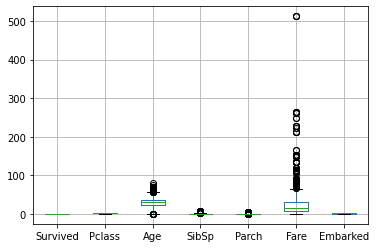

In [105]:
ax = titanic_df.boxplot()

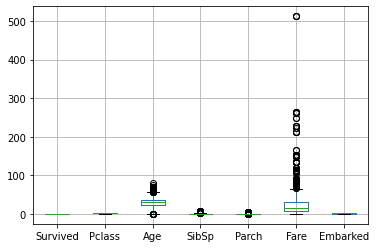

In [106]:
ax = titanic_df[titanic_df.columns[~titanic_df.columns.isin(['PassengerId'])]].boxplot()

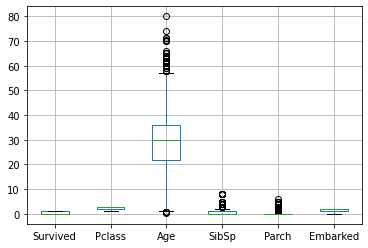

In [107]:
ax = titanic_df[titanic_df.columns[~titanic_df.columns.isin(['PassengerId', 'Fare'])]].boxplot()

**Komentarz o odstających obserwacjach:** przejmujemy się nimi gdy są błędami pomiaru.

In [108]:
titanic_df[titanic_df.Fare>200]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,2,Mr
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,2,Miss
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,0,Mr
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,0,Miss
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,0,Mrs
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,0,Miss
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,2,Miss
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,0,Mr
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,0,Miss


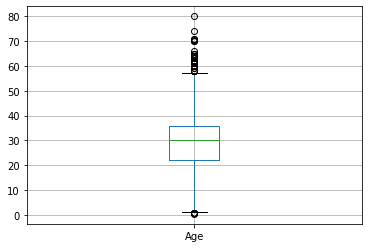

In [109]:
ax = titanic_df[['Age']].boxplot()

In [110]:
titanic_df[titanic_df.Age>65]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,2,Mr
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,0,Mr
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,1,Mr
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,0,Mr
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,2,Mr
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,2,Mr
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,2,Mr
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,2,Mr


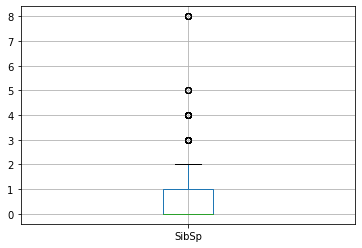

In [111]:
ax = titanic_df[['SibSp']].boxplot()

In [112]:
titanic_df[titanic_df.SibSp>3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,1,Master
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,2,Master
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,2,Master
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,2,Miss
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,2,Miss
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,2,Miss
160,0,3,"Sage, Master. Thomas Henry",male,5.0,8,2,CA. 2343,69.5500,2,Master
165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,2,Master
172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,1,Master


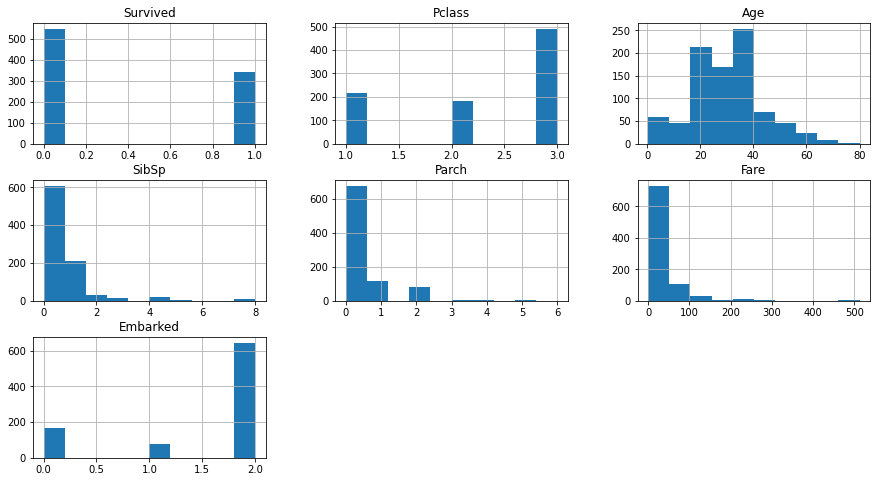

In [113]:
ax = titanic_df.hist(figsize = (15, 8))

In [114]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
titanic_df['SibSp'] = sc.fit_transform(titanic_df['SibSp'].values.reshape(-1,1))

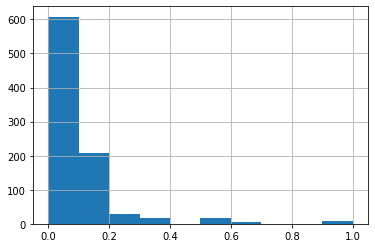

In [115]:
ax = titanic_df['SibSp'].hist()

Przy standardyzacji zakładamy, że podane przez nas informacje mają dystrybucję zgodną z **rozkładem normalnym** (ten dzwonek).

Odejmowanie średniej od wartości jest nazywane **centering**, a dzielenie przez odchylenie standardowe **scaling**. Stąd nazwa **center scaling**.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


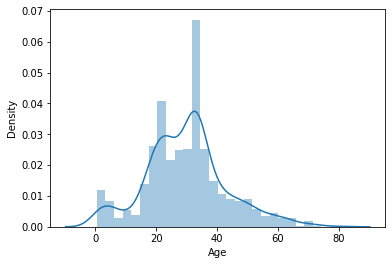

In [116]:
import seaborn as sns

ax = sns.distplot(titanic_df['Age'])

In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
titanic_df['Age'] = sc.fit_transform(titanic_df['Age'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


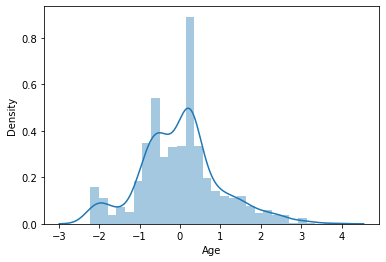

In [118]:
ax = sns.distplot(titanic_df['Age'])